# 1. Preparación de Entorno. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
%pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

Note: you may need to restart the kernel to use updated packages.
  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cython-3.1.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.7 kB)
Using cached cython-3.1.3-cp313-cp313-macosx_11_0_arm64.whl (2.8 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [42 lines of output]
      Partial import of pmdarima during the build process.
      Requirements: ['joblib>=0.11', 'Cython>=0.29,!=0.29.18,!=0.29.31', 'numpy>=1.21.2', 'pandas>=0.19', 'scikit-learn>=0.22', 'scipy>=1.3.2', 'statsmodels>=0.13.2', 'urllib3', 'setuptools>=38.6.0,!=50.0.0', 'packaging>=17.1  # Bundled with setuptools, but want to be explicit']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call las

ModuleNotFoundError: No module named 'pmdarima'

# 2. Carga de Datos. 

## Acuíferos. 

In [ ]:
# Load the aquifer hydrology data
df_aquifers = pd.read_csv("../data/processed/aquifers/aquifer_hydrology_data_clean.csv")
df_aquifers.head()

,Date,Value,Medition_Types,Location
0,1999-01-01,0.0,1,1
1,2000-01-01,0.0,1,1
2,2001-01-01,0.0,1,1
3,2002-01-01,0.0,1,1
4,2003-01-01,0.0,1,1


## Lagos. 

In [ ]:
# Load the lake hydrology data
df_lakes = pd.read_csv("../data/processed/lakes/lake_hydrology_data_clean.csv")
df_lakes.head()

,Date,Value,Measurement_Types,Location
0,2002-06-03,0.0,1,1
1,2002-06-04,0.0,1,1
2,2002-06-05,0.0,1,1
3,2002-06-06,0.0,1,1
4,2002-06-07,0.0,1,1


## Ríos. 

In [ ]:
# Load the river hydrology data
df_rivers = pd.read_csv("../data/processed/rivers/river_hydrology_data_clean.csv")
df_rivers.head()

,Date,Value,Measurement_Types,Location
0,1998-01-01,0.0,1,1
1,1998-01-02,0.0,1,1
2,1998-01-03,0.0,1,1
3,1998-01-04,0.0,1,1
4,1998-01-05,0.0,1,1


## Manantiales. 

In [ ]:
# Load the water spring hydrology data
df_water_spring = pd.read_csv("../data/processed/water_spring/water_spring_hydrology_data_clean.csv")
df_water_spring.head()

,Date,Value,Measurement_Types,Location
0,2000-01-01,0.0,1,1
1,2001-01-01,0.0,1,1
2,2002-01-01,0.0,1,1
3,2003-01-01,0.0,1,1
4,2004-01-01,0.0,1,1


# 3. Definir Features (X) y Variable Target (Y). 

Para definir las variables features y la variable target, se considerarán los datos que nos son útiles para visualizar el nivel de agua según la fecha de cada cuerpo de agua, en este caso __"Value"__ es la variable target, mientras que el resto de las variables se considerarán variables feature.

# 4. Dividir data en train y test. 

In [ ]:
import pandas as pd

def split_time_series_by_percentage(df, split_percentage):
    """
    Splits a time series DataFrame into training and testing sets
    based on a specified percentage. The DataFrame must be ordered chronologically.

    Args:
        df (pd.DataFrame): The input time series DataFrame.
        split_percentage (float): The percentage of data to use for the training set (e.g., 0.8 for 80%).

    Returns:
        tuple: A tuple containing the training and testing DataFrames (train_df, test_df).
    """
    if not 0 < split_percentage < 1:
        raise ValueError("split_percentage must be between 0 and 1.")

    split_point = int(len(df) * split_percentage)
    
    train_df = df.iloc[:split_point]
    test_df = df.iloc[split_point:]
    
    return train_df, test_df

# Example usage:
# Assuming 'df' is your time series DataFrame, already sorted by date.
# train_data, test_data = split_time_series_by_percentage(df, 0.8)

# print("Train Data:")
# print(train_data)
# print("\nTest Data:")
# print(test_data)

In [ ]:
# Split the aquifer data into training and testing sets
train_data_aquifers, test_data_aquifers = split_time_series_by_percentage(df_aquifers, 0.8)

In [ ]:
# Split the lakes data into training and testing sets
train_data_lakes, test_data_lakes = split_time_series_by_percentage(df_lakes, 0.8)

In [ ]:
# Split the rivers data into training and testing sets
train_data_rivers, test_data_rivers = split_time_series_by_percentage(df_rivers, 0.8)

In [ ]:
# Split the water_spring data into training and testing sets
train_data_water_spring, test_data_water_spring = split_time_series_by_percentage(df_water_spring, 0.8)

# 5. Análisis de Series de Tiempo. 

In [ ]:
df_aquifers['Date'] = pd.to_datetime(df_aquifers['Date'], errors='coerce')

In [ ]:
df_aquifers['Date'] = df_aquifers['Date'].dt.date

In [ ]:
all_data = df_aquifers.set_index('Date')

In [ ]:
ts = all_data["Value"]

In [ ]:
ts.head()

Date
2002-06-03    0.0
2002-06-04    0.0
2002-06-05    0.0
2002-06-06    0.0
2002-06-07    0.0
Name: Value, dtype: float64

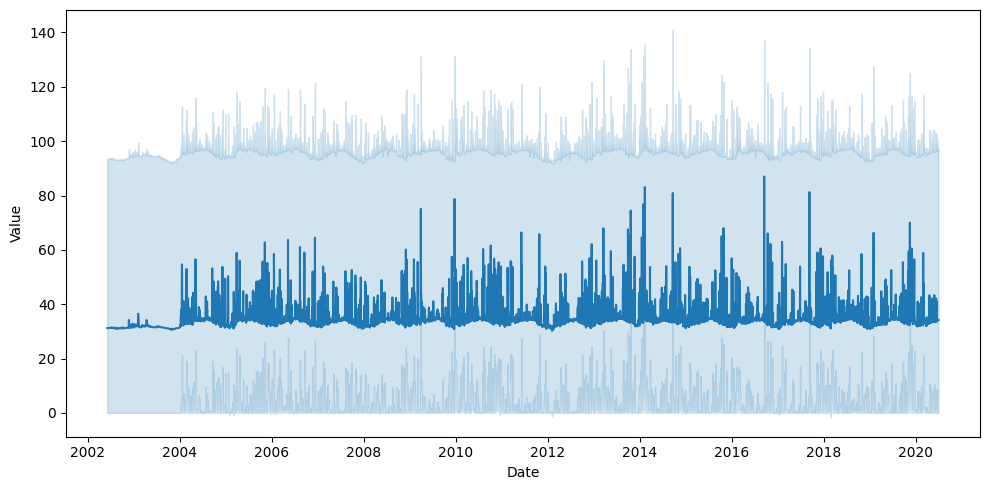

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [ ]:
# Decompose the time series to analyze its components
decomposition = seasonal_decompose(ts, period = 12)
decomposition

### Análisis de tendencia.

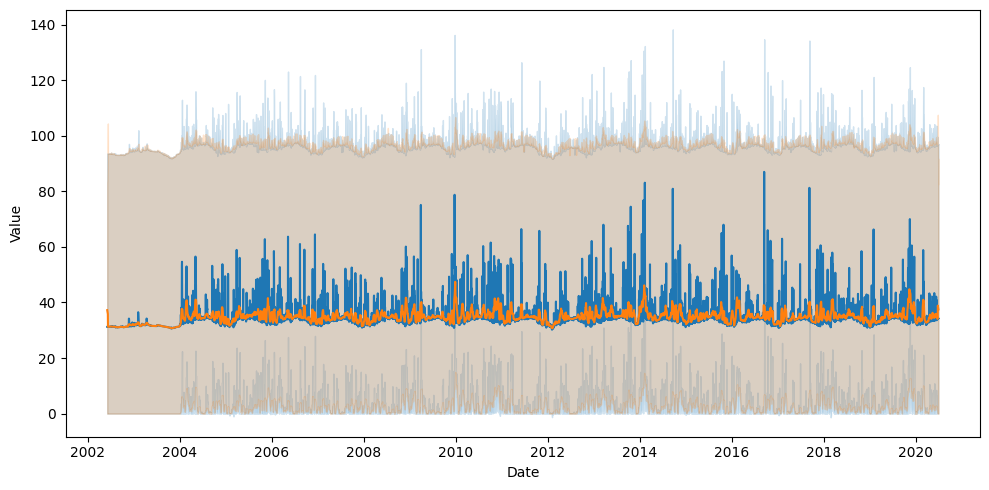

In [ ]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Conclusión (Análisis de tendencia):  
Podemos observar que la tendencia es congruente con la serie, es una tendencia creciente.

### Análisis de estacionalidad.

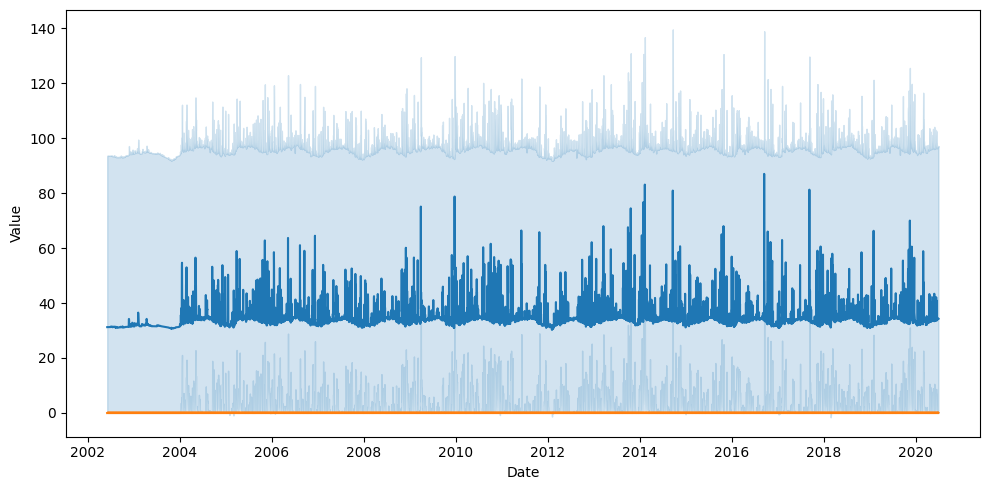

In [ ]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

### Prueba de Dickey-Fuller (Dickey-Fuller test).

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                    -2.198423
p-value                            0.206818
#Lags Used                        58.000000
Number of Observations Used    52765.000000
Critical Value (1%)               -3.430474
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64

### Análisis de variabilidad.

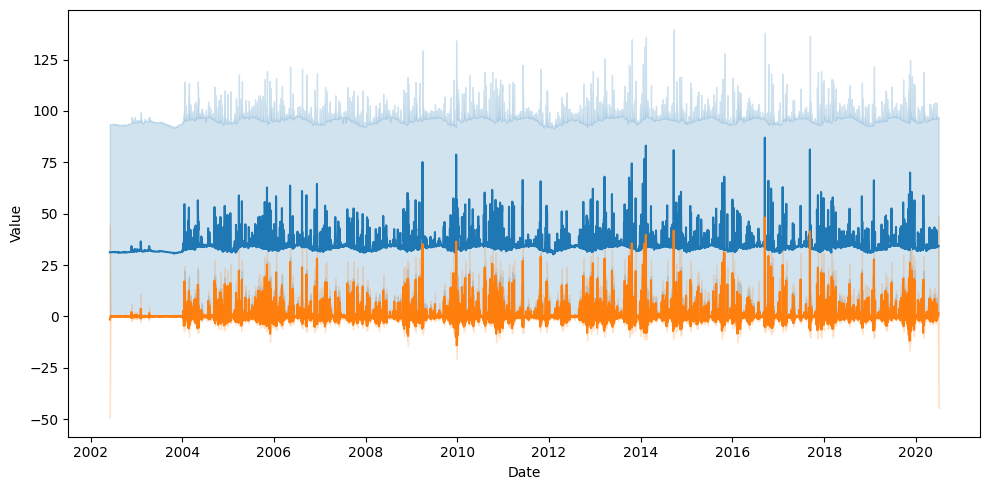

In [ ]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

### Análisis de autocorrelación.

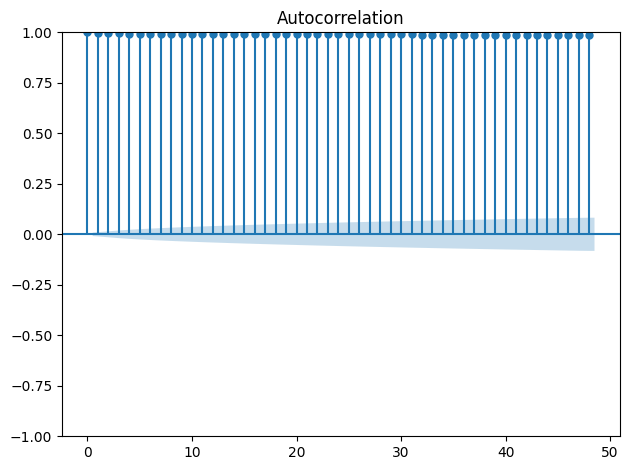

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

# 6. Evaluar modelos e Hiperpárametros.

In [ ]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                    -2.198423
p-value                            0.206818
#Lags Used                        58.000000
Number of Observations Used    52765.000000
Critical Value (1%)               -3.430474
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64

In [ ]:
model = auto_arima(ts, seasonal=True, m=12, trace=True)

# 7. Guardar Modelos. 